---
layout: post
title: BI 4.1 Internet - Web Server
description:  Deployment
type: issues 
comments: true
---

# Members

- Keerthan: Primary Deployment Admin
- Daksha: Secondary Deployment Admin
- Max: Dev
- Ian: Dev
- Zach: Dev

# Prerequisites

- Burndown Issue  
  [Here](https://github.com/Githubneos/scribble_frontend/issues/21)
- Changing the ports!! (8087 is Mr. Mort's, so we chose 8203 for our table)  
  - This is done by changing `main.py` and the frontend API URL to 8203
- Prepping Config files  
  - `main.py`   
  - `Frontend .md`
  - `Dockerfile` (contains all the commands a user could call on the command line to assemble an image)  
  - `docker-compose.yml` (defines and shares multi-container applications)  
  - `nginxfile` (web server designed for use cases involving high volumes of traffic)



# First Time Install

## Logging in

- [Nighthawkcodingsociety](https://cockpit.stu.nighthawkcodingsociety.com/)
-  git clone repo, run script commands
- docker compose build and up-d
- docker ps (look if the repo is there)

# Deployment Tasks

## Route 53
- Go to AWS Route 53 and setup DNS subdomain for your backend server.
    [Link](https://aws.amazon.com/console/)
    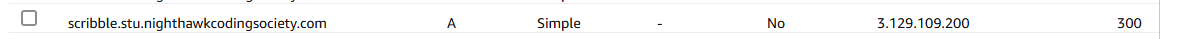
## Set up AWS Server through EC2 terminal

login into the [AWS Terminal](https://cockpit.stu.nighthawkcodingsociety.com/system/terminal)

- Now run the following commands:
    1. Change into the correct directory: cd ~
    2. Clone your backend repo: git clone https://github.com/Githubneos/scribble_backend.git
    3. Navigate into your repo: cd scribble_backend
    4. Build the site: docker-compose up -d --build
    5. Test your site: curl localhost:8203 (8087 Morts Morts Morts)

## Set up Nginx
-  reverse proxy (map) of your application to your Domain.

In [ ]:
 server {
      listen 80;
      listen [::]:80;
      server_name scribble.stu.nighthawkcodingsociety.com;

      location / {
          proxy_pass http://localhost:8203;

          # Preflighted requests
          if ($request_method = OPTIONS) {
              add_header "Access-Control-Allow-Credentials" "true" always;
              add_header "Access-Control-Allow-Origin"  "https://Githubneos.github.io" always;
              add_header "Access-Control-Allow-Methods" "GET, POST, PUT, DELETE, OPTIONS, HEAD" always;
              add_header "Access-Control-Allow-MaxAge" 600 always;
              add_header "Access-Control-Allow-Headers" "Authorization, Origin, X-Origin, X-Requested-With, Content-Type, Accept" always;
              return 204;
          }
      }
  }

## Set up Certbot (HTTPS)
- required after nginx file to get a certificate in order for the http request to be secure (https)

In [ ]:
Which names would you like to activate HTTPS for?
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
: scribble.stu.nighthawkcodingsociety.com
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Select the appropriate numbers separated by commas and/or spaces, or leave input
blank to select all options shown (Enter 'c' to cancel):
    
Cert not yet due for renewal

You have an existing certificate that has exactly the same domains or certificate name you requested and isn't close to expiry.
(ref: /etc/letsencrypt/renewal/nighthawkcodingsociety.com-0001.conf)

What would you like to do?
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
1: Attempt to reinstall this existing certificate
2: Renew & replace the cert (limit ~5 per 7 days)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Please choose whether or not to redirect HTTP traffic to HTTPS, removing HTTP access.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
1: No redirect - Make no further changes to the webserver configuration.
2: Redirect - Make all requests redirect to secure HTTPS access. Choose this for
new sites, or if you're confident your site works on HTTPS. You can undo this
change by editing your web server's configuration.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Select the appropriate number [1-2] then [enter] (press 'c' to cancel): 2

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Your existing certificate has been successfully renewed, and the new certificate
has been installed